# Визуализация данных с помощью Seaborn

Цель задания - исследование датасета dataset_file_storage.csv и визуализация данных с помощью Seaborn.

Для каждой задачи необходимо:

- Построить график-гистограмму (размер графика должен быть достаточным для визуального анализа).

- Подписать оси и заголовок.

- Ответить на поставленные вопросы.
___________

- Код должен выполняться при условии наличия датасета в каталоге со скриптом или указанием пути к датасету (падение кода с ошибкой у проверяющего на python аналогичной версии - повод не зачесть все пункты соответствующей задачи).

Описание полей датасета:
- ProjectID (число) - id проекта в рамках которого загружен файл, привязка к элементам другой таблицы
- UserID (число) - id пользователя, загрузившего файл, привязка к элементам другой таблицы
- uploadServerUnixTime (число) - время загрузки файла на сервер в формате UnixTime
- CompanyID (число) - id организации которой принадлежит пользователь, привязка элемента другой таблицы
- FileSize (число) - размер файла в байтах
- TypeDocs (строка) - раздел в который загружен файл
    
Для общего понимания архитектуры датасета:
Есть организации-застройщики (CompanyID), в каждой из которых может быть несколько пользователей (UserID).
Существуют проекты (ProjectID), к каждому из которых может иметь доступ несколько пользователей разных организаций (пользователь может иметь доступ к нескольким проектам).
Внутри каждого проекта есть несколько разделов (TypeDocs), в который пользователь загружает файлы для организации.

Перед выполнением заданий необходимо импортировать требуемые для работы модули Python, загрузить датасет в датафрейм и выполнить его предварительную обработку:
- очистить датафрейм от неполных данных (есть записи за неполный месяц март);
- преобразовать столбец "uploadServerUnixTime" в пригодный для работы формат с помощь методов модуля datetime;
- на основе столбца "uploadServerUnixTime" добавить необходимые столбцы для группировки данных (месяц, день и т.п

Пожелания при выполнении заданий (они не влияют на итоговую оценку):
- постарайтесь оформить как функцию вывод однотипных графиков и вызывать её в нужных местах;
- для облегчения понимания написанного кода добавлять к нему комментарии.

In [1]:
# импорт модулей и данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('dataset_file_storage.csv', sep=';')
df.head()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
0,753919,27549,1582272443,753918,732686,6.Юридические документы
1,726628,26990,1582216416,726615,2484373,8.Другие документы
2,705607,26912,1571732077,703124,22,1.Основные документы
3,705605,26912,1571048621,703124,4,1.Основные документы
4,705605,26912,1570799210,703124,1030735,1.Основные документы


In [4]:
df.index = pd.to_datetime(df.uploadServerUnixTime, unit='s') # индекс как время загрузки файла
df.index.name = 'datetime'
df.head()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
datetime,,,,,,
2020-02-21 08:07:23,753919,27549,1582272443,753918,732686,6.Юридические документы
2020-02-20 16:33:36,726628,26990,1582216416,726615,2484373,8.Другие документы
2019-10-22 08:14:37,705607,26912,1571732077,703124,22,1.Основные документы
2019-10-14 10:23:41,705605,26912,1571048621,703124,4,1.Основные документы
2019-10-11 13:06:50,705605,26912,1570799210,703124,1030735,1.Основные документы


In [5]:
df_new1 = df.resample('D').FileSize.sum() # группировка по дням
df_new1.head()

datetime
2019-10-10    239262494
2019-10-11      2061474
2019-10-12            0
2019-10-13            0
2019-10-14           12
Freq: D, Name: FileSize, dtype: int64

In [6]:
df_new2 = df_new1.cumsum() # сумма с накоплением
df_new2.tail()

datetime
2020-02-27    25485815197
2020-02-28    25613154112
2020-02-29    25613154112
2020-03-01    25613154112
2020-03-02    25758692529
Freq: D, Name: FileSize, dtype: int64

## Задание №1

### Задание 1.1
Постройте накопительный график/гистограмму суммарного объёма загруженных файлов по дням (используйте логарифмическую шкалу для объёма).

Text(0, 0.5, 'Суммарный объем')

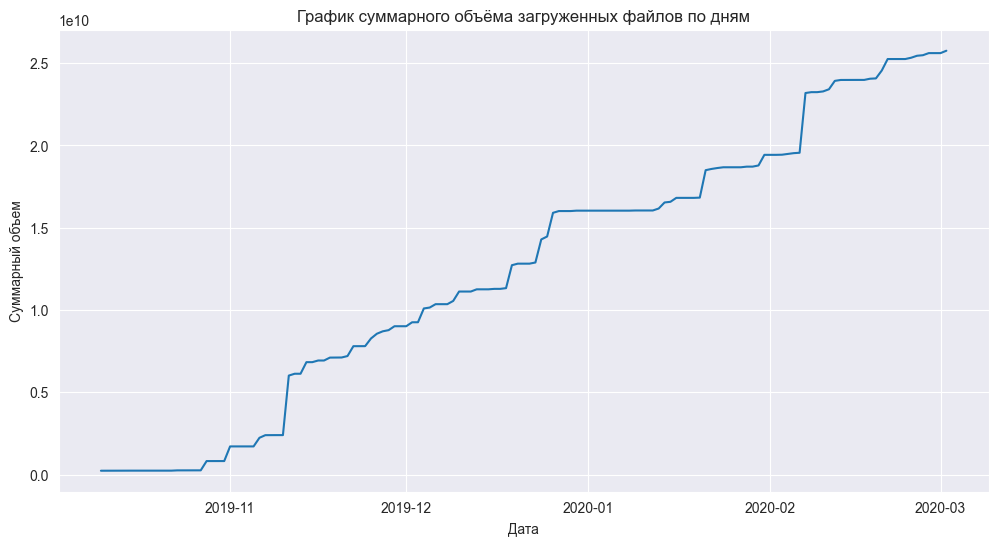

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_new2)
ax.set_title('График суммарного объёма загруженных файлов по дням')
plt.xlabel('Дата')
plt.ylabel('Суммарный объем')

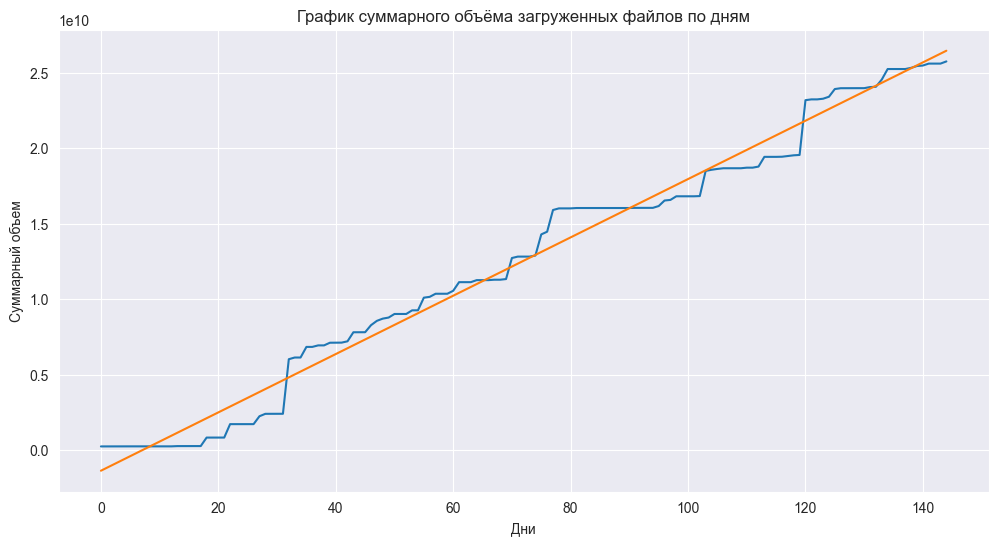

In [8]:
x = list(range(len(df_new2))) # для линии тренда
#x = df1['y-m-d']
y = df_new2
fig, ax = plt.subplots(figsize=(12, 6))
#sns.lineplot(x='uploadServerUnixTime', y='SumSize', data=df)
sns.lineplot(x = x, y = y)
ax.set_title('График суммарного объёма загруженных файлов по дням')
plt.xlabel('Дни')
plt.ylabel('Суммарный объем')

z = np.polyfit (x, y, 1) # коэффициенты линии тренда
p = np.poly1d (z)

#add trendline to plot
plt.plot (x, p(x)) 

In [9]:
z

array([ 1.93318869e+08, -1.37117096e+09])

### Задание 1.2
Какой прогноз можно дать по объему файлового хранилища на конец 2020?

In [10]:
d20_12 = datetime.fromisoformat('2020-12-31')
d20_3 = datetime.fromisoformat('2020-03-02') # последний день в данных
diff_days = d20_12 - d20_3
diff_days.days # разница в днях

304

### Прогноз

In [11]:
p(len(df_new1) + 304)

85429001391.3248

### Задание 1.3
На основании прогноза постройте накопительный график/гистограмму суммарного объёма загруженных файлов помесячно: первые месяцы будут реальные данные, а далее, начиная с марта - прогнозируемый объем. (Подсказка: для более точного прогноза месячного прироста суммарного объема файлов исключите из анализа месяцы с неполными данными.)

In [12]:
df_new3 = df.resample('M').FileSize.sum() # группировка по месяцам
df_new3.head()

datetime
2019-10-31     826412626
2019-11-30    8192058931
2019-12-31    7022650581
2020-01-31    3391116262
2020-02-29    6180915712
Freq: M, Name: FileSize, dtype: int64

In [13]:
month_mean = df_new3.iloc[1:-1].mean() #среднее по месяцу без неполных месяцев
month_mean

6196685371.5

In [14]:
dt_from = pd.to_datetime('2020-03-01')
dt_to = pd.to_datetime("2020-12-31")

In [15]:
# добавляем среднее
df_new6 = df_new3.iloc[:-1].append(pd.Series([month_mean]*10, index = pd.date_range(dt_from, dt_to, freq='M')))
df_new6

AttributeError: 'Series' object has no attribute 'append'

In [16]:
df_res = df_new6.cumsum()
df_res

NameError: name 'df_new6' is not defined

In [17]:
x = df_res.index.to_period("M")   
y = df_res
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = x, y = y)
ax.set_title('График суммарного объёма загруженных файлов по месяцам')
plt.xlabel('Дата')
plt.ylabel('Суммарный объем')
#plt.ylim(230000000,)

NameError: name 'df_res' is not defined

## Задание №2
Постройте 2 гистограммы:
-	Распределения количества файлов по дням недели
-	Распределения количества файлов по часам

In [18]:
#  Распределения количества файлов по дням недели----------
df['week'] = df.index.dayofweek
df_new7 = df.groupby('week').FileSize.sum() # группировка по дням недели
df_new7

week
0    5712231686
1    4787210449
2    2559768090
3    5123520149
4    7420286566
5     155675589
Name: FileSize, dtype: int64

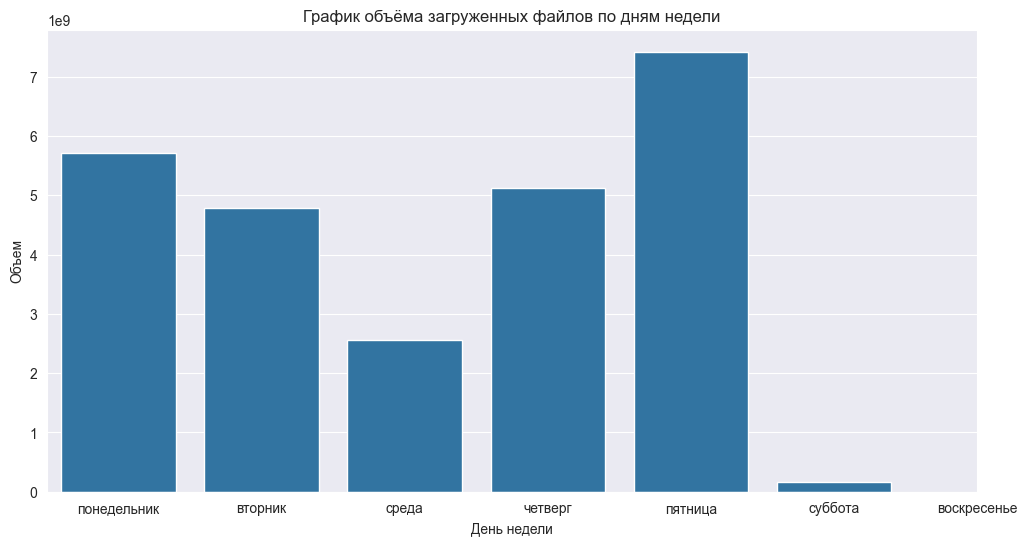

In [19]:
res = ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]
x = df_new7.index
y = df_new7
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = x, y = y)
ax.set_title('График объёма загруженных файлов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Объем')
x_ticks = [0, 1, 2, 3, 4, 5, 6]
x_labels = res 
#add x-axis values to plot
plt.xticks (ticks=x_ticks, labels=x_labels)
plt.show()

In [20]:
# Распределения количества файлов по часам------
#df['hour'] = df.index.to_period('H')
df['hour'] = df.index.hour
df_new8 = df.groupby('hour').FileSize.sum() # группировка по часам
df_new8

hour
4       45507800
5       89905842
6      131429067
7     2831241903
8     3402594746
9     1399231673
10     423054689
11    2130587103
12    3697227988
13    5387410573
14    2677344870
15    2977344763
16     395218928
17      19375524
18     148602298
19        235790
21       2378972
Name: FileSize, dtype: int64

Text(0, 0.5, 'Объем')

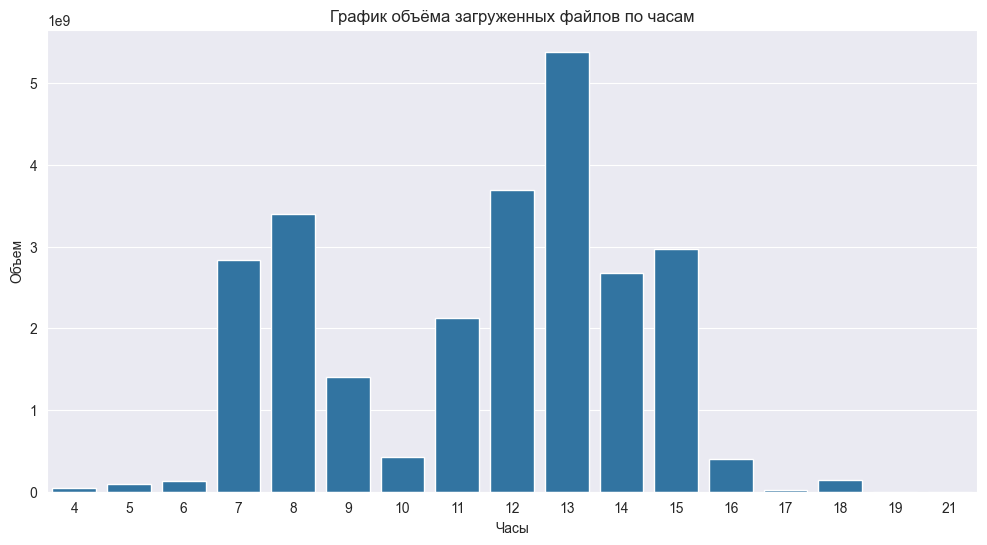

In [21]:
x = df_new8.index
y = df_new8
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x = x, y = y)
ax.set_title('График объёма загруженных файлов по часам')
plt.xlabel('Часы')
plt.ylabel('Объем')

### Задание 2.1 (дополнительное для отличников)
На основании построенных гистограмм какие выводы можно сделать?

In [ ]:
# Больше всего файлов выкладывается в рабочие дни и рабочие часы

## Задание №3
Постройте 2 гистограммы:
- Распределения количества файлов в зависимости от раздела.
- Постройте ящики с усами для среднего количества файлов в проекте в зависимости от раздела.

In [22]:
# Распределения количества файлов в зависимости от раздела------
df_new9 = df.groupby('TypeDocs').UserID.count()
df_new9

TypeDocs
1.Основные документы        533
2.Технические условия       164
3.Материалы для KYC          78
4.Презентация по проекту     20
5.Финансовые документы      336
6.Юридические документы     358
7.Cмешанный проект            5
8.Другие документы          358
Name: UserID, dtype: int64

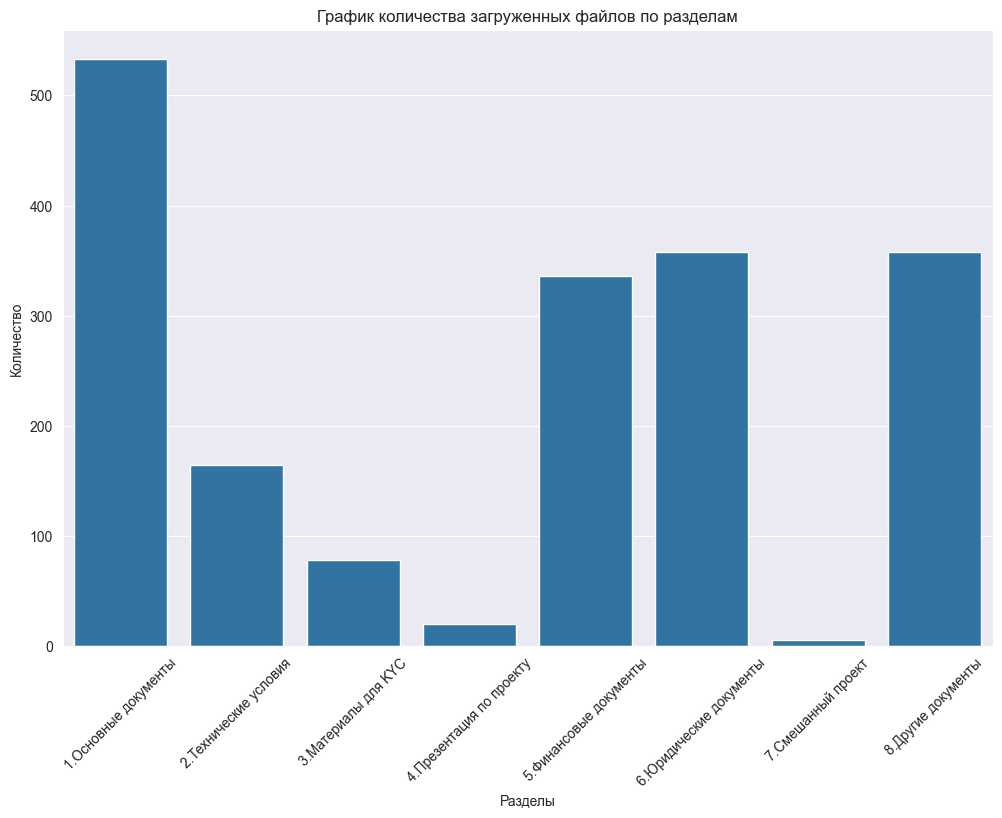

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = df_new9.index, y = df_new9)
ax.set_title('График количества загруженных файлов по разделам')
plt.xlabel('Разделы')
plt.ylabel('Количество')
plt.xticks(rotation = 45)
plt.show()

In [24]:
# ящики с усами для среднего количества файлов в проекте в зависимости от раздела------
df_new10 = df.groupby(['TypeDocs','ProjectID']).UserID.count()
df_new10 = df_new10.reset_index()
df_new10

,TypeDocs,ProjectID,UserID
0,1.Основные документы,705605,13
1,1.Основные документы,705606,12
2,1.Основные документы,705607,95
3,1.Основные документы,721181,2
4,1.Основные документы,721640,5
...,...,...,...
129,8.Другие документы,741922,13
130,8.Другие документы,744107,2
131,8.Другие документы,746664,6
132,8.Другие документы,754225,5


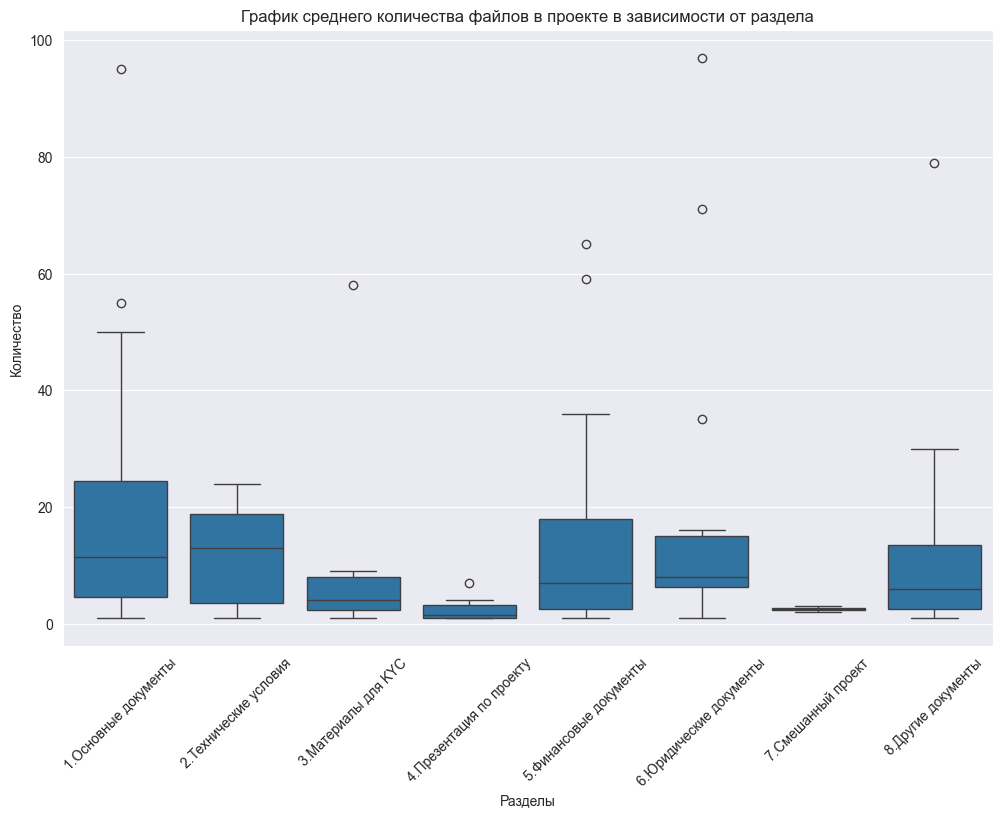

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x = 'TypeDocs', y = 'UserID', data = df_new10)
ax.set_title('График среднего количества файлов в проекте в зависимости от раздела')
plt.xlabel('Разделы')
plt.ylabel('Количество')
plt.xticks(rotation = 45)
plt.show()

### Задание 3.1 (дополнительное для отличников)
Какие рекомендации можно дать по создания/удалению разделов?

In [ ]:
# 7. Смешаный проект можно убрать в 8. Другие ...

## Задание №4
Постройте гистограмму суммарного объёма файлов по проектам (используйте логарифмическую шкалу для объёма).

In [26]:
# Суммарный объём файлов по проектам------
df_new11 = df.groupby('ProjectID').FileSize.sum()
df_new11.head()

ProjectID
705605    3950576179
705606     101217813
705607    1453545094
720089       1185673
721181      16036453
Name: FileSize, dtype: int64

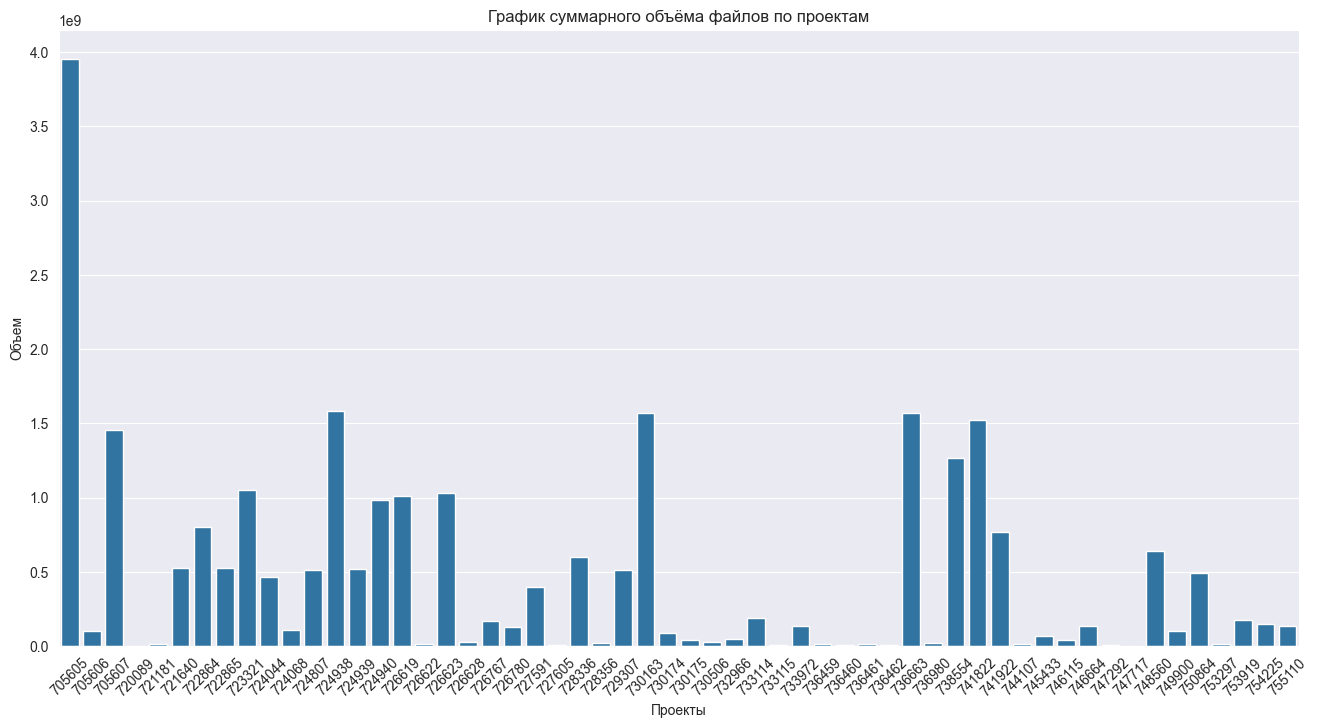

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x = df_new11.index, y = df_new11)
ax.set_title('График cуммарного объёма файлов по проектам')
plt.xlabel('Проекты')
plt.ylabel('Объем')
plt.xticks(rotation = 45)
plt.show()

## Задание №5
Постройте ящики с усами для размеров загружаемых файлов по компаниям.

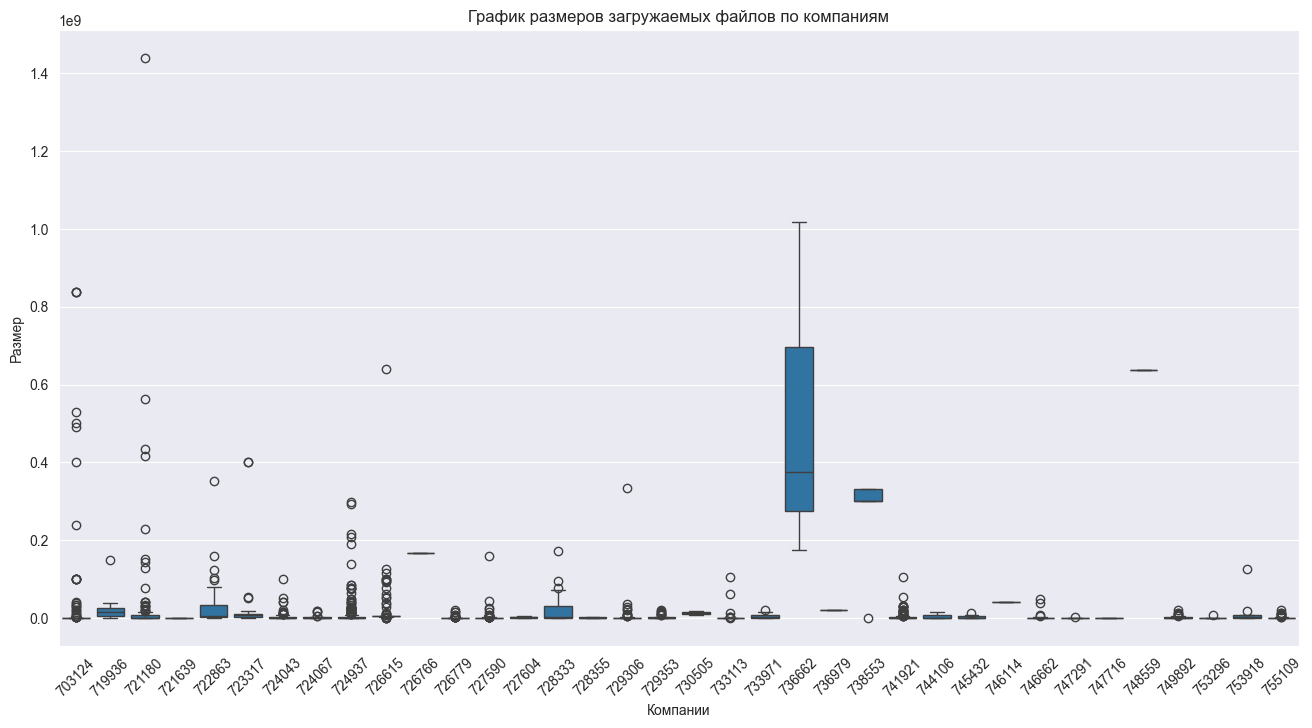

In [28]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x = 'CompanyID', y = 'FileSize', data = df)
ax.set_title('График размеров загружаемых файлов по компаниям')
plt.xlabel('Компании')
plt.ylabel('Размер')
plt.xticks(rotation = 45)
plt.show()

### Задание 5.1 (дополнительное для отличников)
Можно ли сделать какие-то выводы о предпочтениях к большим/маленьким файлам в разных компаниях? Можно ли сделать практически полезные выводы для администраторов сервиса загрузки?

In [ ]:
# Компании 736662б 738553 и 748859 имеют предпочтения к большим файлам, остальнык - к маленьким

## Задание №6
Какие ещё графики вы построили для этих данных и какой вывод из этой иллюстрации можно сделать? Постройте ещё хотя бы 1 любой график/гистограмму/боксплот или иную иллюстрацию.

In [29]:
# ------
df_new12 = df.groupby('UserID').ProjectID.nunique()
df_new12 = df_new12[df_new12>1]
df_new12.head()

UserID
26912    3
26947    4
26973    5
26984    3
26990    2
Name: ProjectID, dtype: int64

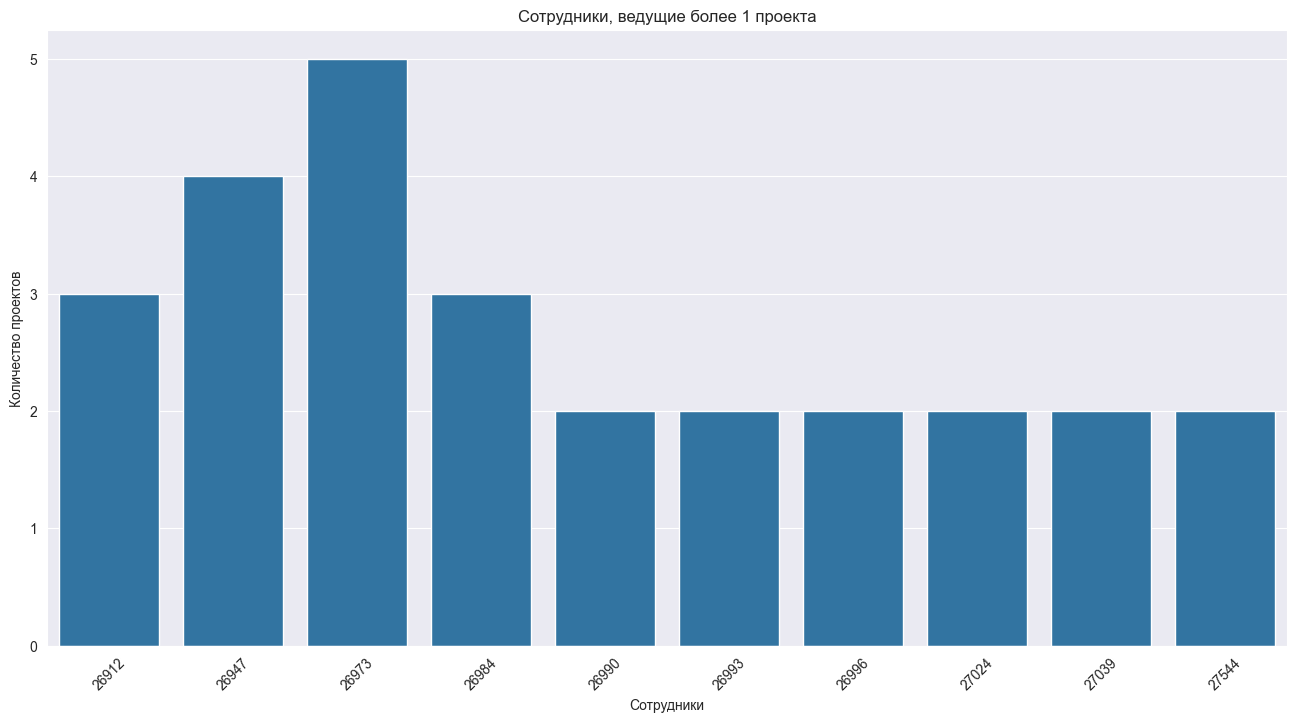

In [30]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x = df_new12.index, y = df_new12)
ax.set_title('Cотрудники, ведущие более 1 проекта')
plt.xlabel('Сотрудники')
plt.ylabel('Количество проектов')
plt.xticks(rotation = 45)
plt.show()

In [31]:
df_new13 = df[['UserID', 'ProjectID', 'CompanyID']].agg(['nunique', 'count'])
df_new13.head()

,UserID,ProjectID,CompanyID
nunique,46,56,36
count,1852,1852,1852
